In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistics
from evaluation.classification.statistics import get_precisions
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size
plt.style.use("ggplot")
%matplotlib inline

### --- compare precision ---

In [2]:
resnet50_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_not_pretrain/validation_matrix.csv')
resnet50_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')
resnet50_pretrained_freeze = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_freeze/validation_matrix.csv')

In [3]:
resnet50_not_pretrained_precisions = get_precisions(resnet50_not_pretrained)
resnet50_pretrained_freeze_precisions = get_precisions(resnet50_pretrained_freeze)
resnet50_pretrained_precisions = get_precisions(resnet50_pretrained)

In [4]:
exp_name = ["resnet50_not_pretrained", "resnet50_pretrained_freeze", "resnet50_pretrained"]
exp_ap = [resnet50_not_pretrained_precisions.mean(), resnet50_pretrained_freeze_precisions.mean(), resnet50_pretrained_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_name": exp_name, "exp_ap": exp_ap})
df

,exp_name,exp_ap
0,resnet50_not_pretrained,0.506048
1,resnet50_pretrained_freeze,0.617119
2,resnet50_pretrained,0.877763


In [6]:
df_per_label = pd.DataFrame({"resnet50_not_pretrained": resnet50_not_pretrained_precisions, "resnet50_pretrained_freeze": resnet50_pretrained_freeze_precisions, "resnet50_pretrained": resnet50_pretrained_precisions})
df_per_label['Name'] = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
df_per_label

,resnet50_not_pretrained,resnet50_pretrained_freeze,resnet50_pretrained,Name
0,0.744630,0.816229,0.933174,Diptera
1,0.529412,0.784314,0.960784,Ephemeridae
2,0.405000,0.420000,0.770000,Ephemeroptera
3,0.588889,0.633333,0.885185,Lepidoptera
4,0.328358,0.432836,0.813433,Plecoptera
5,0.440000,0.616000,0.904000,Trichoptera


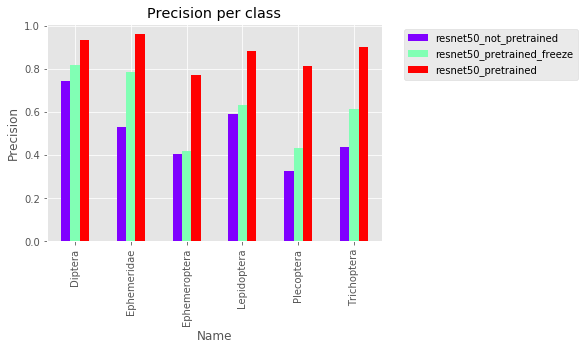

In [8]:
df_per_label.plot(kind="bar", x="Name", y=["resnet50_not_pretrained", "resnet50_pretrained_freeze", "resnet50_pretrained"], cmap="rainbow")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Precision")
plt.title("Precision per class")
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [9]:
cls_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/each_size_df.csv')
cls_each_size_df["order"] = cls_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(cls_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})

In [10]:
resnet50_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_not_pretrain/all_size_df.csv')
resnet50_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/all_size_df.csv')
resnet50_pretrained_freeze = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_freeze/all_size_df.csv')

In [11]:
resnet50_not_pretrained = resnet50_not_pretrained.drop(resnet50_not_pretrained.index[[0]])
resnet50_pretrained_freeze = resnet50_pretrained_freeze.drop(resnet50_pretrained_freeze.index[[0]])
resnet50_pretrained = resnet50_pretrained.drop(resnet50_pretrained.index[[0]])

In [12]:
insect_size_df

,order,count
0,1.0,1
1,7.0,12
2,8.0,51
3,9.0,127
4,10.0,236
5,11.0,290
6,12.0,310
7,13.0,209
8,14.0,78
9,15.0,10


In [13]:
all_df = resnet50_not_pretrained
all_df = all_df.rename(columns={'Accuracy': 'resnet50_not_pretrained'})
all_df = all_df.assign(resnet50_pretrained_freeze=resnet50_pretrained_freeze["Accuracy"])
all_df = all_df.assign(resnet50_pretrained=resnet50_pretrained["Accuracy"])
all_df

,order,resnet50_not_pretrained,Insect_size,order.1,resnet50_pretrained_freeze,resnet50_pretrained
1,7.0,1.000000,205.833333,7.0,0.916667,1.000000
2,8.0,0.862745,395.039216,8.0,0.705882,0.901961
3,9.0,0.503937,770.850394,9.0,0.535433,0.716535
4,10.0,0.343220,1504.529661,10.0,0.423729,0.805085
5,11.0,0.396552,2941.368966,11.0,0.565517,0.875862
6,12.0,0.654839,5934.145161,12.0,0.780645,0.938710
7,13.0,0.732057,11264.789474,13.0,0.822967,0.956938
8,14.0,0.705128,22344.653846,14.0,0.628205,0.961538
9,15.0,0.600000,34865.400000,15.0,0.700000,0.900000


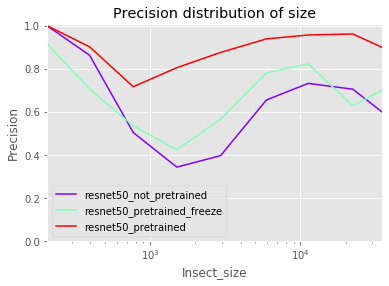

In [14]:
all_df.plot(x="Insect_size", y=["resnet50_not_pretrained", "resnet50_pretrained_freeze", "resnet50_pretrained"], logx=True, legend=True, cmap="rainbow")
plt.ylabel("Precision")
plt.title("Precision distribution of size")
plt.ylim(0.0, 1.01)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/compare_precision_distrib_of_size.png", bbox_inches="tight")